In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data/Ecommerce.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Data Cleaning (No Null Values)

In [4]:
for col in df.columns:
    print(f'For column {col}\n----------------\n')
    print(df[col].value_counts())
    print('\n')

For column ID
----------------

2047     1
3355     1
7465     1
5416     1
9510     1
        ..
10848    1
4703     1
6750     1
605      1
2049     1
Name: ID, Length: 10999, dtype: int64


For column Warehouse_block
----------------

F    3666
D    1834
A    1833
C    1833
B    1833
Name: Warehouse_block, dtype: int64


For column Mode_of_Shipment
----------------

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64


For column Customer_care_calls
----------------

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64


For column Customer_rating
----------------

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64


For column Cost_of_the_Product
----------------

245    110
257    109
260    106
254    101
264    100
      ... 
99       5
107      5
120      5
96       5
122      4
Name: Cost_of_the_Product, Length: 215, dtype: int64


For column Prior_purchases
--------

In [5]:
for col in df.columns:
    print(f'For column {col}\n----------------\n')
    print(df[col].unique())
    print('\n')

For column ID
----------------

[    1     2     3 ... 10997 10998 10999]


For column Warehouse_block
----------------

['D' 'F' 'A' 'B' 'C']


For column Mode_of_Shipment
----------------

['Flight' 'Ship' 'Road']


For column Customer_care_calls
----------------

[4 2 3 5 6 7]


For column Customer_rating
----------------

[2 5 3 1 4]


For column Cost_of_the_Product
----------------

[177 216 183 176 184 162 250 233 150 164 189 232 198 275 152 227 143 239
 145 161 156 211 251 225 172 234 266 257 223 149 137 181 215 269 139 174
 151 210 169 160 190 141 165 170 203 246 238 193 221 179 105 261 202 109
 158 231 206 187 230 113 180 132 217 197 185 278 229 186 286 175 219 213
 235 271 144 218 263 168 265 205 252 222 220 147 200 224 247 280 157 207
 237 264 248 191 146 135  98  97 114 112 274 166 148 270 242 192 116 255
 209 134 130 133 140 136 142 154 155 127 129 159 294 226 258 241 208 182
 115 212 171 249 243 163 272 138 273 279 173 194 262 201 260 188 267 131
 122 103 199 236 167 259 

In [6]:
df.isna()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,False,False,False,False,False,False,False,False,False,False,False,False
10995,False,False,False,False,False,False,False,False,False,False,False,False
10996,False,False,False,False,False,False,False,False,False,False,False,False
10997,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

In [8]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# Separating Categorical and Float for ease of processing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
Object_1 = df.select_dtypes(include='object').columns
Float_1 = df.select_dtypes(exclude='object').columns

In [11]:
Float_1

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [12]:
for col in Object_1:
    print(col, '\n', df[col].unique(), '\n')

Warehouse_block 
 ['D' 'F' 'A' 'B' 'C'] 

Mode_of_Shipment 
 ['Flight' 'Ship' 'Road'] 

Product_importance 
 ['low' 'medium' 'high'] 

Gender 
 ['F' 'M'] 



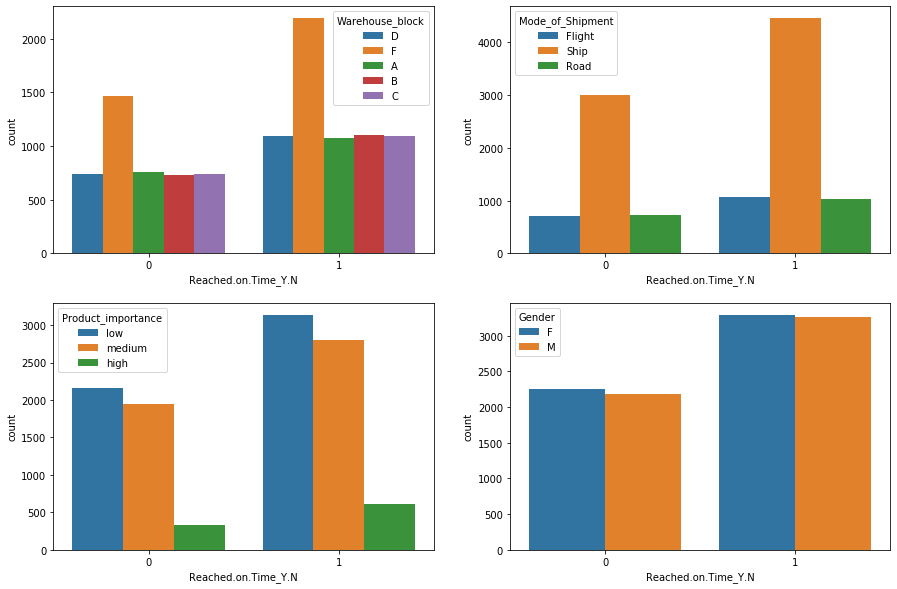

In [13]:
i = 1
plt.figure(figsize =(15, 10))
for col in Object_1:
    plt.subplot(2,2,i)
    sns.countplot(x='Reached.on.Time_Y.N', hue =df[col], data=df)
    i +=1

# Work With Categorical Data

In [14]:
df1 = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], drop_first=True)

In [15]:
df1

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,2,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,3,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,4,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,5,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,1538,1,0,0,0,0,0,1,0,1,0
10995,10996,4,1,232,5,6,1247,0,1,0,0,0,0,1,0,1,0
10996,10997,5,4,242,5,4,1155,0,0,1,0,0,0,1,1,0,0
10997,10998,5,2,223,6,2,1210,0,0,0,0,1,0,1,0,1,1


In [16]:
df1 = df1.drop(['ID'], 1)

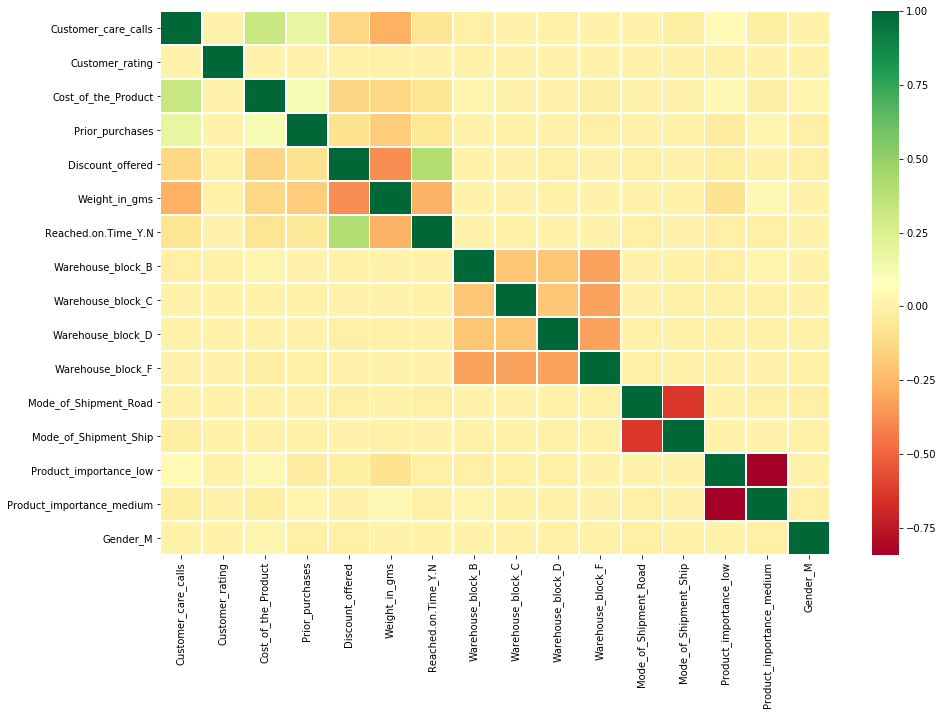

In [17]:
plt.figure(figsize = (15,10))
corr = df1.corr()
sns.heatmap(corr, linewidth = 0.7, cmap = 'RdYlGn')

# Detecting Outliers

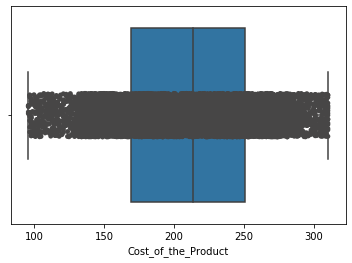

In [18]:
sns.boxplot(x='Cost_of_the_Product', data=df1)
sns.stripplot(x='Cost_of_the_Product', data=df1, color="#474646")

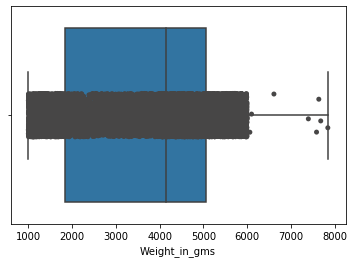

In [19]:
sns.boxplot(x='Weight_in_gms', data=df1)
sns.stripplot(x='Weight_in_gms', data=df1, color="#474646")

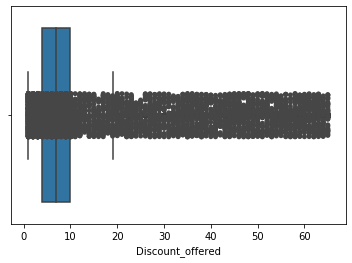

In [20]:
sns.boxplot(x='Discount_offered', data=df1)
sns.stripplot(x='Discount_offered', data=df1, color="#474646")

In [21]:
from datasist.structdata import detect_outliers

In [22]:
for i in range(3):
    outliers_indices = detect_outliers(df1, 0, ['Discount_offered'])
    col_median = df1['Discount_offered'].median()
    df1['Discount_offered'].iloc[outliers_indices] = col_median

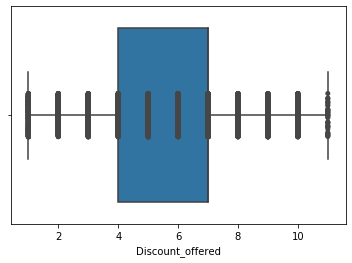

In [23]:
sns.boxplot(x='Discount_offered', data=df1)
sns.stripplot(x='Discount_offered', data=df1, color="#474646")

# Split Data

In [24]:
from sklearn.model_selection import train_test_split

x = df1.drop('Reached.on.Time_Y.N', axis=1)
y = df1['Reached.on.Time_Y.N']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [25]:
training_data = pd.concat([x_train, y_train], axis=1)
training_data

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M,Reached.on.Time_Y.N
4473,3,1,173,2,10.0,4115,1,0,0,0,0,1,1,0,1,1
1394,6,2,294,4,7.0,1265,0,0,0,0,0,1,1,0,1,1
7978,3,4,188,5,3.0,4835,0,1,0,0,0,1,1,0,0,1
8444,6,4,281,3,7.0,5180,0,0,0,0,0,1,1,0,0,0
7295,4,3,252,2,6.0,5266,0,0,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,7,5,306,4,2.0,1281,0,0,0,1,0,1,0,1,0,0
10385,5,5,272,2,4.0,5342,0,0,0,1,1,0,1,0,0,0
3473,3,2,204,4,4.0,4745,0,0,0,1,0,1,1,0,1,0
8535,3,5,154,10,10.0,5282,1,0,0,0,0,1,0,0,0,1


# Imbalanced Classes (Reached.on.Time_Y.N)

In [26]:
df1['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [27]:
df1['Reached.on.Time_Y.N'].value_counts() * 100 / len(df1)

1    59.669061
0    40.330939
Name: Reached.on.Time_Y.N, dtype: float64

# Not Reached on Time = 1
# Reached on Time = 0

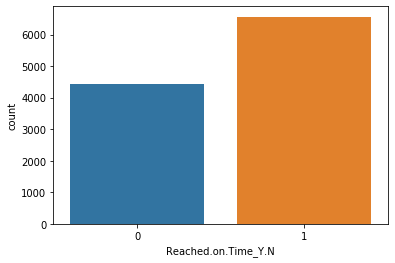

In [28]:
sns.countplot(x='Reached.on.Time_Y.N', data=df1)

In [29]:
from sklearn.utils import resample

not_reached_on_time = training_data[training_data['Reached.on.Time_Y.N'] == 1]
reached_on_time = training_data[training_data['Reached.on.Time_Y.N'] == 0] 

reached_on_time_upsampled = resample(reached_on_time, replace=True, n_samples=len(not_reached_on_time), random_state=27)

upsampled = pd.concat([not_reached_on_time, reached_on_time_upsampled])

upsampled['Reached.on.Time_Y.N'].value_counts()

#from imblearn.over_sampling import SMOTE

#sm = SMOTE(random_state=27)
#x_train, y_train = sm.fit_resample(x_train, y_train)

1    5226
0    5226
Name: Reached.on.Time_Y.N, dtype: int64

In [30]:
y_train.value_counts()

1    5226
0    3573
Name: Reached.on.Time_Y.N, dtype: int64

In [31]:
x_train = upsampled.drop('Reached.on.Time_Y.N', axis=1)
y_train = upsampled['Reached.on.Time_Y.N']

In [32]:
x_train

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
4473,3,1,173,2,10.0,4115,1,0,0,0,0,1,1,0,1
1394,6,2,294,4,7.0,1265,0,0,0,0,0,1,1,0,1
7978,3,4,188,5,3.0,4835,0,1,0,0,0,1,1,0,0
7295,4,3,252,2,6.0,5266,0,0,0,1,0,1,1,0,1
7354,3,5,265,4,8.0,5087,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,4,1,202,3,10.0,4454,0,0,0,1,0,1,1,0,1
8072,2,3,263,3,10.0,5997,0,0,0,0,1,0,1,0,1
8071,4,1,241,2,3.0,5672,0,0,0,1,1,0,1,0,1
5141,4,5,240,5,8.0,4558,0,0,0,1,0,1,1,0,1


In [33]:
y_train

4473    1
1394    1
7978    1
7295    1
7354    1
       ..
9271    0
8072    0
8071    0
5141    0
7057    0
Name: Reached.on.Time_Y.N, Length: 10452, dtype: int64

In [34]:
training_data = pd.concat([x_train, y_train], axis=1)
training_data

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M,Reached.on.Time_Y.N
4473,3,1,173,2,10.0,4115,1,0,0,0,0,1,1,0,1,1
1394,6,2,294,4,7.0,1265,0,0,0,0,0,1,1,0,1,1
7978,3,4,188,5,3.0,4835,0,1,0,0,0,1,1,0,0,1
7295,4,3,252,2,6.0,5266,0,0,0,1,0,1,1,0,1,1
7354,3,5,265,4,8.0,5087,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,4,1,202,3,10.0,4454,0,0,0,1,0,1,1,0,1,0
8072,2,3,263,3,10.0,5997,0,0,0,0,1,0,1,0,1,0
8071,4,1,241,2,3.0,5672,0,0,0,1,1,0,1,0,1,0
5141,4,5,240,5,8.0,4558,0,0,0,1,0,1,1,0,1,0


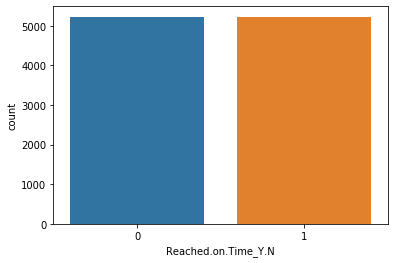

In [35]:
sns.countplot(x='Reached.on.Time_Y.N', data=training_data)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Fitting different classfication models on our data

In [37]:
conda install -c anaconda py-xgboost 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

In [40]:
models = {
    'LR': LogisticRegression(),
    'SVC': SVC(),
    'RF': RandomForestClassifier(n_estimators=500),
    'DT': DecisionTreeClassifier(),
    'KN': KNeighborsClassifier(n_neighbors=15),
    'XG': XGBClassifier(n_estimators=700)
}

In [41]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, model.predict(x_test)))}')
    print('\n')

Using model: LR
Training Score: 0.6351894374282434
Test Score: 0.6359090909090909
RMSE: 0.6033994606319342


Using model: SVC
Training Score: 0.7386146192116342
Test Score: 0.6518181818181819
RMSE: 0.5900693333683917


Using model: RF
Training Score: 1.0
Test Score: 0.6436363636363637
RMSE: 0.5969620057957092


Using model: DT
Training Score: 1.0
Test Score: 0.6463636363636364
RMSE: 0.5946733251427742


Using model: KN
Training Score: 0.722636815920398
Test Score: 0.6222727272727273
RMSE: 0.6145952104656143


Using model: XG
Training Score: 0.8074052812858783
Test Score: 0.6686363636363636
RMSE: 0.5756419341601482




In [42]:
model = XGBClassifier(n_estimators=700)
model.fit(x_train, y_train)

XGBClassifier(n_estimators=700)

In [43]:
y_pred = model.predict(x_test)
y_pred[0:10]

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [44]:
y_test[0:10]

9299    0
2738    1
8726    1
8970    0
1966    1
6993    1
7397    0
456     1
1286    1
846     1
Name: Reached.on.Time_Y.N, dtype: int64

# Testing 

In [45]:
import joblib

In [46]:
joblib.dump(model, 'model.h5')

['model.h5']

In [47]:
joblib.dump(model, 'scaler.h5')

['scaler.h5']

In [48]:
x.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Product_importance_low', 'Product_importance_medium', 'Gender_M'],
      dtype='object')

In [49]:
len(x.columns)

15

In [50]:
test_data = [3, 2, 205, 4, 55, 1030, 0, 1, 0, 0, 0, 1, 0, 0, 1]

In [51]:
len(test_data)

15

In [52]:
test_data = scaler.transform([test_data])

In [53]:
model.predict(test_data)

array([1])